🔍 Fraud Detection - Exploratory Data Analysis
📁 Loading cleaned data...
Dataset shape: (50000, 31)
Fraud rate: 0.1933 (19.33%)

📈 1. Basic Distributions


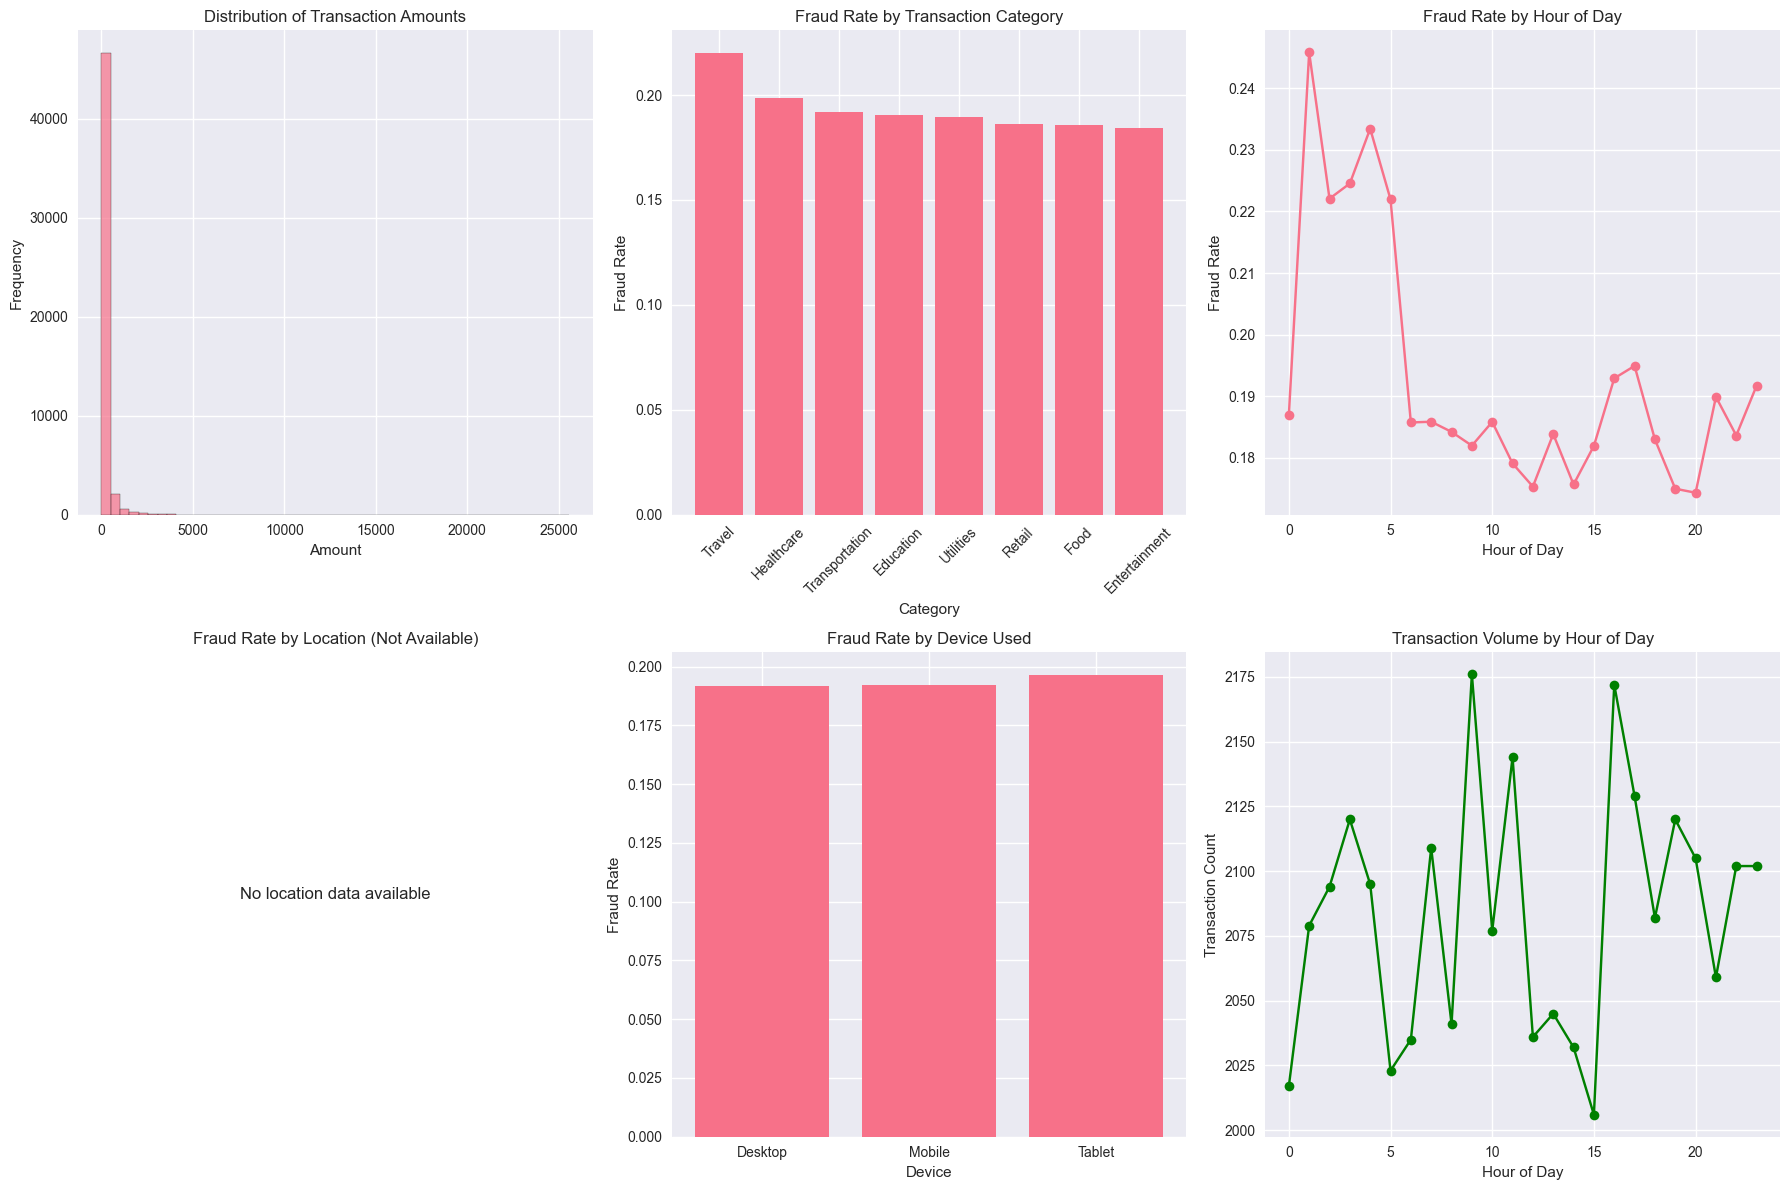


🎯 2. Fraud Patterns Analysis


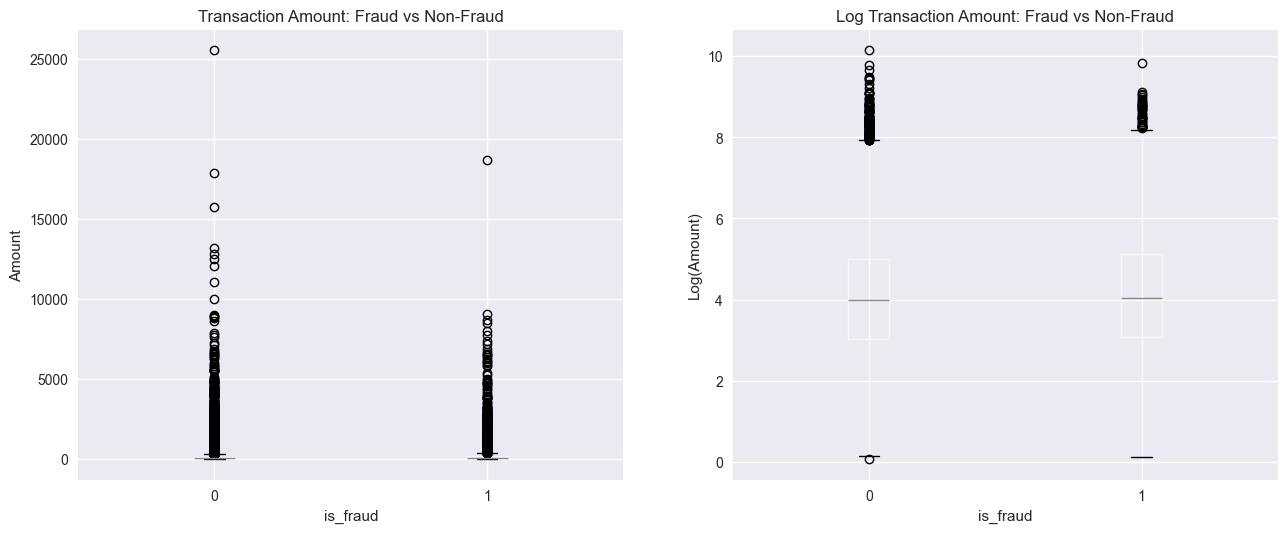


📊 3. Correlation Analysis


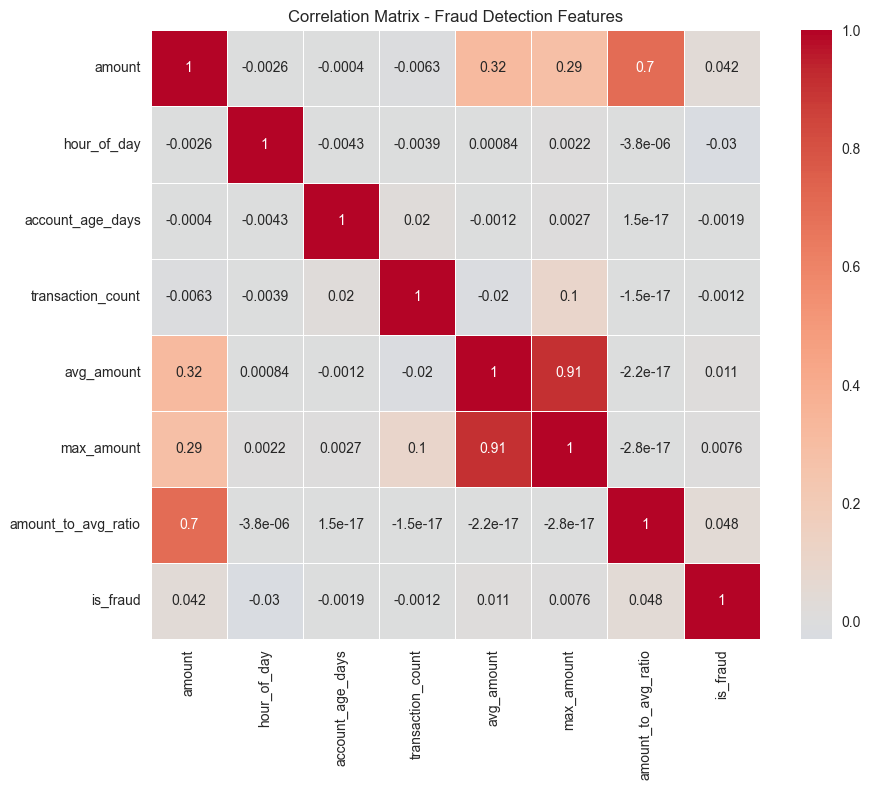


⏰ 4. Time Series Analysis


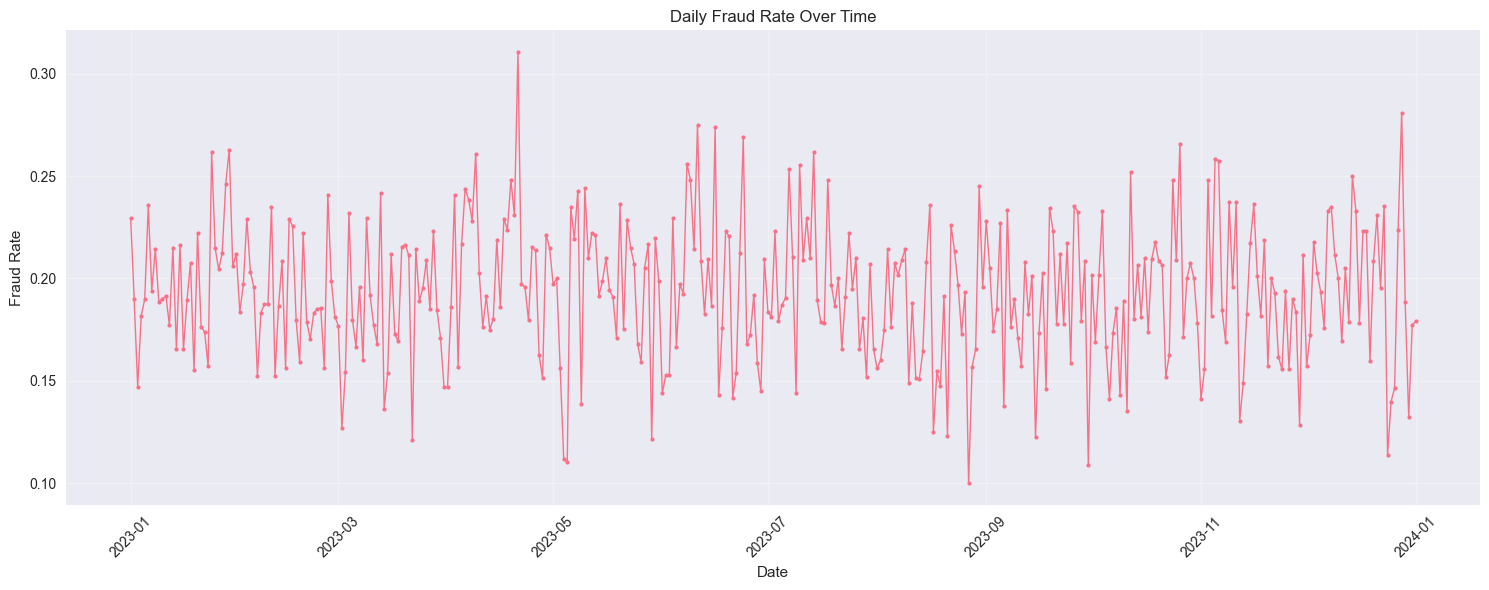


👤 5. User Behavior Analysis


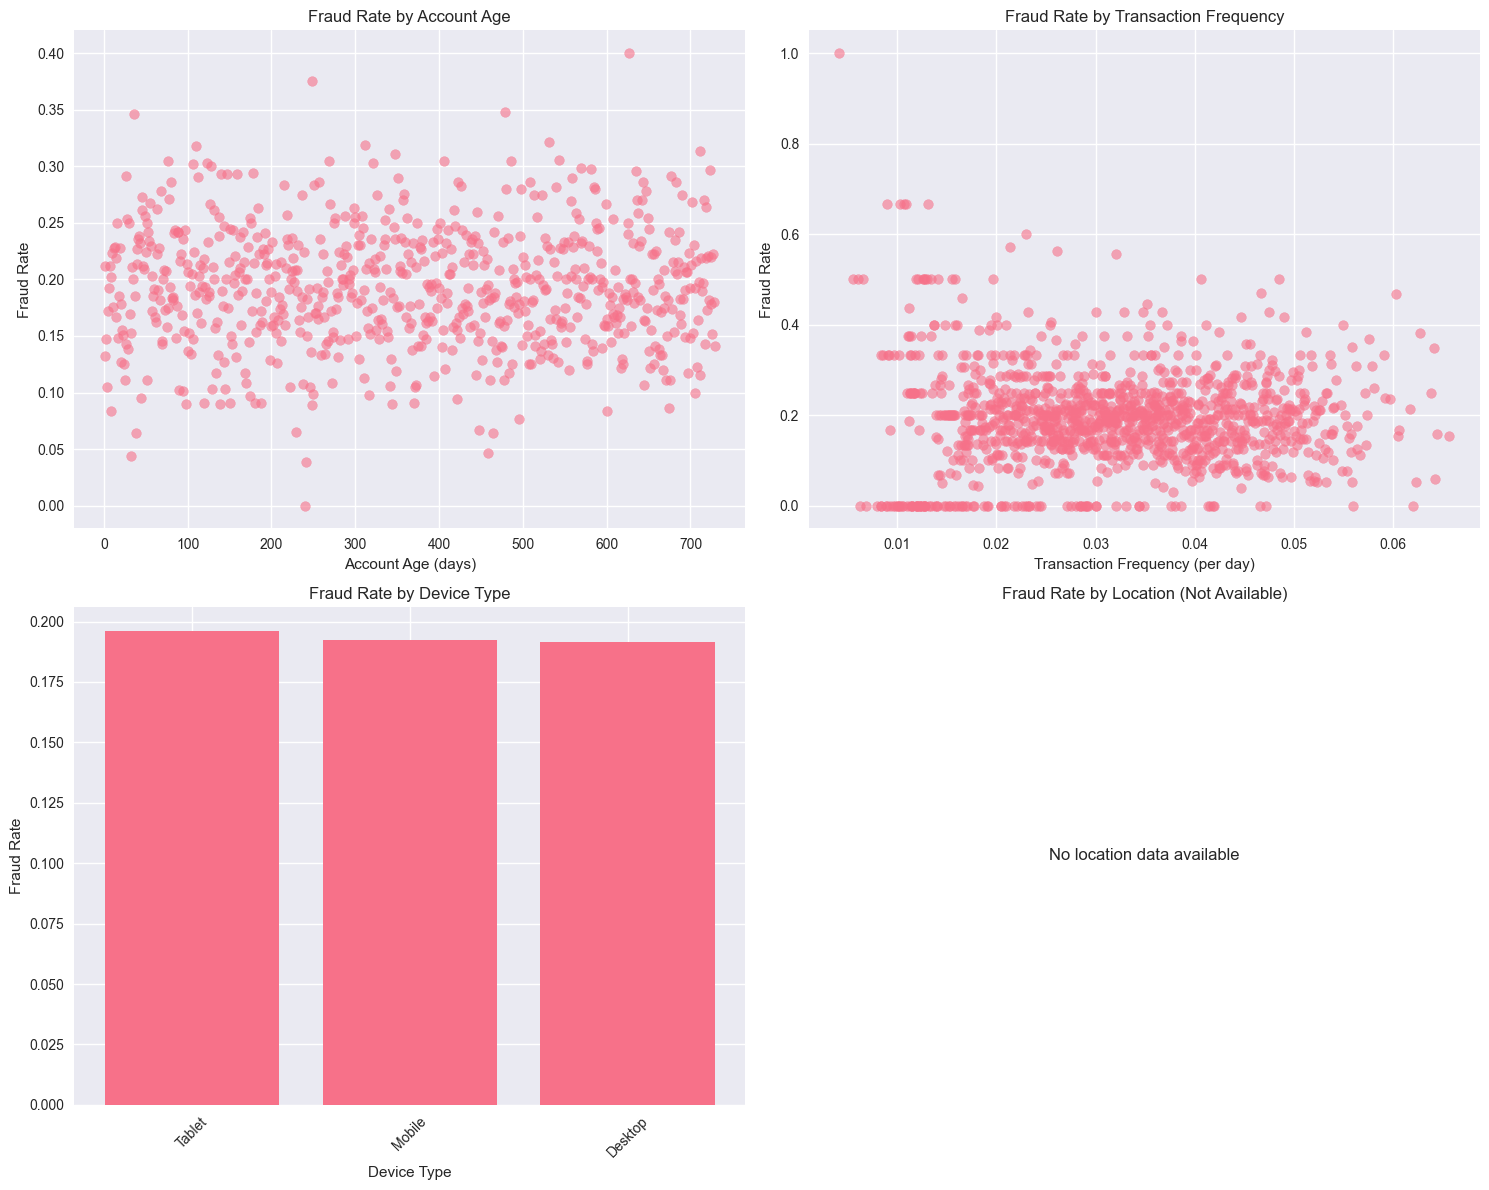


💡 6. Key Insights Summary
Overall fraud rate: 0.1933 (19.33%)
Total fraud cases: 9,667
Total transactions: 50,000

🚨 Top Risk Factors (by fraud rate):

By Category:
  Travel: 0.2198 (21.98%)
  Healthcare: 0.1988 (19.88%)
  Transportation: 0.1919 (19.19%)
  Education: 0.1907 (19.07%)
  Utilities: 0.1894 (18.94%)

By Location: No location data available

By Device:
  Desktop: 0.1916 (19.16%)
  Mobile: 0.1922 (19.22%)
  Tablet: 0.1962 (19.62%)

High-value transactions fraud rate: 0.3196 (31.96%)
International transactions fraud rate: nan (nan%)
Late night transactions fraud rate: 0.1927 (19.27%)

✅ EDA completed! Key risk patterns identified.


In [11]:
# Fraud Detection - Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore")

# Setup
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)

print("🔍 Fraud Detection - Exploratory Data Analysis")
print("=" * 60)

# Load cleaned data
print("📁 Loading cleaned data...")
fraud_data = pd.read_csv("../../data/processed/fraud_data_clean.csv")
fraud_data["transaction_date"] = pd.to_datetime(fraud_data["transaction_date"])

print(f"Dataset shape: {fraud_data.shape}")
print(
    f"Fraud rate: {fraud_data['is_fraud'].mean():.4f} ({fraud_data['is_fraud'].mean():.2%})"
 )

# 1. Basic Distribution Analysis
print("\n📈 1. Basic Distributions")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Transaction amount distribution
axes[0, 0].hist(fraud_data["amount"], bins=50, alpha=0.7, edgecolor="black")
axes[0, 0].set_title("Distribution of Transaction Amounts")
axes[0, 0].set_xlabel("Amount")
axes[0, 0].set_ylabel("Frequency")

# Fraud by category
fraud_by_category = (
    fraud_data.groupby("category")["is_fraud"].mean().sort_values(ascending=False)
 )
axes[0, 1].bar(fraud_by_category.index, fraud_by_category.values)
axes[0, 1].set_title("Fraud Rate by Transaction Category")
axes[0, 1].set_xlabel("Category")
axes[0, 1].set_ylabel("Fraud Rate")
axes[0, 1].tick_params(axis="x", rotation=45)

# Fraud by hour
fraud_by_hour = fraud_data.groupby("hour_of_day")["is_fraud"].mean()
axes[0, 2].plot(fraud_by_hour.index, fraud_by_hour.values, marker="o")
axes[0, 2].set_title("Fraud Rate by Hour of Day")
axes[0, 2].set_xlabel("Hour of Day")
axes[0, 2].set_ylabel("Fraud Rate")

# Fraud by location (top area)
if "location" in fraud_data.columns:
    fraud_by_location = fraud_data.groupby("location")["is_fraud"].mean()
    axes[1, 0].bar(fraud_by_location.index, fraud_by_location.values)
    axes[1, 0].set_title("Fraud Rate by Location")
    axes[1, 0].set_xlabel("Location")
    axes[1, 0].set_ylabel("Fraud Rate")
else:
    axes[1, 0].text(0.5, 0.5, "No location data available", ha='center', va='center', fontsize=12)
    axes[1, 0].set_title("Fraud Rate by Location (Not Available)")
    axes[1, 0].axis('off')

# Fraud by device
fraud_by_device = fraud_data.groupby("device_used")["is_fraud"].mean()
axes[1, 1].bar(fraud_by_device.index, fraud_by_device.values)
axes[1, 1].set_title("Fraud Rate by Device Used")
axes[1, 1].set_xlabel("Device")
axes[1, 1].set_ylabel("Fraud Rate")

# Transaction volume by hour
volume_by_hour = fraud_data.groupby("hour_of_day").size()
axes[1, 2].plot(volume_by_hour.index, volume_by_hour.values, marker="o", color="green")
axes[1, 2].set_title("Transaction Volume by Hour of Day")
axes[1, 2].set_xlabel("Hour of Day")
axes[1, 2].set_ylabel("Transaction Count")

plt.tight_layout()
plt.show()

# 2. Fraud Patterns Analysis
print("\n🎯 2. Fraud Patterns Analysis")

# Amount analysis for fraud vs non-fraud
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot of amounts
fraud_data.boxplot(column="amount", by="is_fraud", ax=axes[0])
axes[0].set_title("Transaction Amount: Fraud vs Non-Fraud")
axes[0].set_ylabel("Amount")

# Log scale for better visualization
fraud_data["log_amount"] = np.log1p(fraud_data["amount"])
fraud_data.boxplot(column="log_amount", by="is_fraud", ax=axes[1])
axes[1].set_title("Log Transaction Amount: Fraud vs Non-Fraud")
axes[1].set_ylabel("Log(Amount)")

plt.suptitle("")
plt.show()

# 3. Correlation Analysis
print("\n📊 3. Correlation Analysis")

# Select numerical features for correlation
numerical_features = [
    "amount",
    "hour_of_day",
    "account_age_days",
    "transaction_count",
    "avg_amount",
    "max_amount",
    "amount_to_avg_ratio",
    "is_fraud",
]

correlation_matrix = fraud_data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
)
plt.title("Correlation Matrix - Fraud Detection Features")
plt.tight_layout()
plt.show()

# 4. Time Series Analysis
print("\n⏰ 4. Time Series Analysis")

# Daily fraud rate
daily_fraud = fraud_data.groupby(fraud_data["transaction_date"].dt.date)[
    "is_fraud"
].mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_fraud.index, daily_fraud.values, marker="o", linewidth=1, markersize=3)
plt.title("Daily Fraud Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. User Behavior Analysis
print("\n👤 5. User Behavior Analysis")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Account age vs fraud
account_age_fraud = fraud_data.groupby("account_age_days")["is_fraud"].mean()
axes[0, 0].scatter(account_age_fraud.index, account_age_fraud.values, alpha=0.6)
axes[0, 0].set_title("Fraud Rate by Account Age")
axes[0, 0].set_xlabel("Account Age (days)")
axes[0, 0].set_ylabel("Fraud Rate")

# Transaction frequency vs fraud
tx_freq_fraud = fraud_data.groupby("transaction_frequency")["is_fraud"].mean()
axes[0, 1].scatter(tx_freq_fraud.index, tx_freq_fraud.values, alpha=0.6)
axes[0, 1].set_title("Fraud Rate by Transaction Frequency")
axes[0, 1].set_xlabel("Transaction Frequency (per day)")
axes[0, 1].set_ylabel("Fraud Rate")

# Device type analysis
device_analysis = (
    fraud_data.groupby("device_used")
    .agg({"is_fraud": "mean", "user_id": "count"})
    .rename(columns={"user_id": "transaction_count"})
)
device_analysis = device_analysis.sort_values("is_fraud", ascending=False)

axes[1, 0].bar(device_analysis.index, device_analysis["is_fraud"])
axes[1, 0].set_title("Fraud Rate by Device Type")
axes[1, 0].set_xlabel("Device Type")
axes[1, 0].set_ylabel("Fraud Rate")
axes[1, 0].tick_params(axis="x", rotation=45)

# Location analysis (guarded)
if "location" in fraud_data.columns:
    location_analysis = (
        fraud_data.groupby("location")
        .agg({"is_fraud": "mean", "user_id": "count"})
        .rename(columns={"user_id": "transaction_count"})
    )
    location_analysis = location_analysis.sort_values("is_fraud", ascending=False)
    axes[1, 1].bar(location_analysis.index, location_analysis["is_fraud"])
    axes[1, 1].set_title("Fraud Rate by Location")
    axes[1, 1].set_xlabel("Location")
    axes[1, 1].set_ylabel("Fraud Rate")
else:
    axes[1, 1].text(0.5, 0.5, "No location data available", ha='center', va='center', fontsize=12)
    axes[1, 1].set_title("Fraud Rate by Location (Not Available)")
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# 6. Key Insights Summary
print("\n💡 6. Key Insights Summary")

print(
    f"Overall fraud rate: {fraud_data['is_fraud'].mean():.4f} ({fraud_data['is_fraud'].mean():.2%})"
 )
print(f"Total fraud cases: {fraud_data['is_fraud'].sum():,}")
print(f"Total transactions: {len(fraud_data):,}")

# Top risk factors
print("\n🚨 Top Risk Factors (by fraud rate):")

# By category
print("\nBy Category:")
for category, rate in fraud_by_category.head().items():
    print(f"  {category}: {rate:.4f} ({rate:.2%})")

# By location (guarded)
if "location" in fraud_data.columns:
    print("\nBy Location:")
    for location, rate in fraud_by_location.items():
        print(f"  {location}: {rate:.4f} ({rate:.2%})")
else:
    print("\nBy Location: No location data available")

# By device
print("\nBy Device:")
for device, rate in fraud_by_device.items():
    print(f"  {device}: {rate:.4f} ({rate:.2%})")

# High-value transactions
high_value_fraud_rate = fraud_data[fraud_data["is_high_value"] == 1]["is_fraud"].mean()
print(
    f"\nHigh-value transactions fraud rate: {high_value_fraud_rate:.4f} ({high_value_fraud_rate:.2%})"
 )

# International transactions
international_fraud_rate = fraud_data[fraud_data["is_international"] == 1][
    "is_fraud"
].mean()
print(
    f"International transactions fraud rate: {international_fraud_rate:.4f} ({international_fraud_rate:.2%})"
 )

# Late night transactions
late_night_fraud_rate = fraud_data[fraud_data["is_late_night"] == 1]["is_fraud"].mean()
print(
    f"Late night transactions fraud rate: {late_night_fraud_rate:.4f} ({late_night_fraud_rate:.2%})"
 )

print("\n✅ EDA completed! Key risk patterns identified.")